# Project 1

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

## Impoprting the  Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


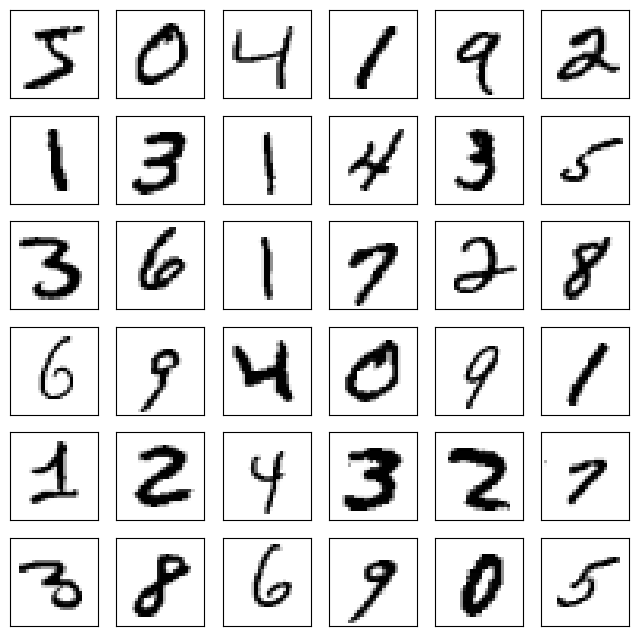

In [4]:
plt.figure(figsize=(8, 8))
for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(x_train[i]), cmap=plt.cm.binary)

In [5]:
#Normalise the pixel value
x_train = (np.expand_dims(x_train, axis=-1)/255.).astype(np.float32)
x_test = (np.expand_dims(x_test, axis=-1)/255.).astype(np.float32)


# x_train=x_train/255
# x_test=x_test/255

# #Reshaping
# x_train=x_train.reshape(-1, 28, 28, 1)
# x_test=x_test.reshape(-1, 28, 28, 1)

# x_train = x_train.astype(np.float32)
# x_test = x_test.astype(np.float32)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


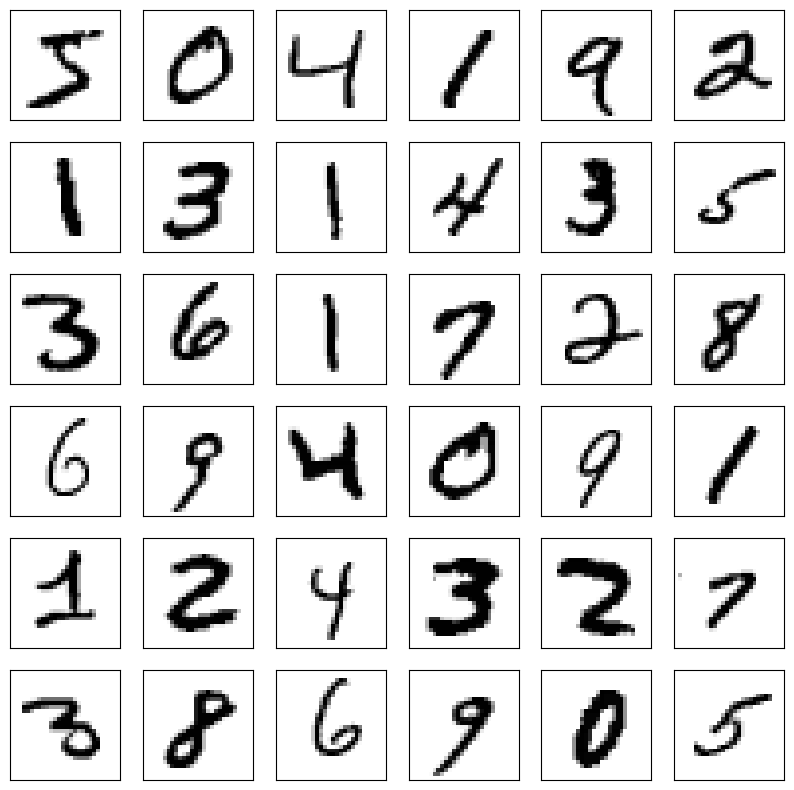

In [7]:
plt.figure(figsize=(10, 10))
for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(x_train[i]), cmap=plt.cm.binary)

##Neural Network

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8796 - loss: 0.4279 - val_accuracy: 0.9588 - val_loss: 0.1386
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9643 - loss: 0.1202 - val_accuracy: 0.9723 - val_loss: 0.0965
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9775 - loss: 0.0763 - val_accuracy: 0.9749 - val_loss: 0.0818
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9837 - loss: 0.0547 - val_accuracy: 0.9749 - val_loss: 0.0806
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9757 - val_loss: 0.0756
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9789 - val_loss: 0.0693
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9921 - loss: 0.0254 - val_accuracy: 0.9778 - val_loss: 0.0753
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9933 - loss: 0.021

###Checking Accuracy

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0999
Test accuracy:  0.9753999710083008


##Convolutional Neural Network

In [19]:
#from logging import Filter
cnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [20]:
print(cnn_model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9026 - loss: 0.3180 - val_accuracy: 0.9820 - val_loss: 0.0568
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9836 - loss: 0.0501 - val_accuracy: 0.9881 - val_loss: 0.0368
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy: 0.9890 - val_loss: 0.0323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9885 - val_loss: 0.0375
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9894 - val_loss: 0.0386
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9880 - val_loss: 0.0372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 37ms/step - accuracy: 0.9966 - loss: 0.0095 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9970 -

In [18]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print('Test accuracy: ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9787 - loss: 0.0694
Test accuracy:  0.9850000143051147


##Prediction with CNN

In [ ]:
predictions = cnn_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


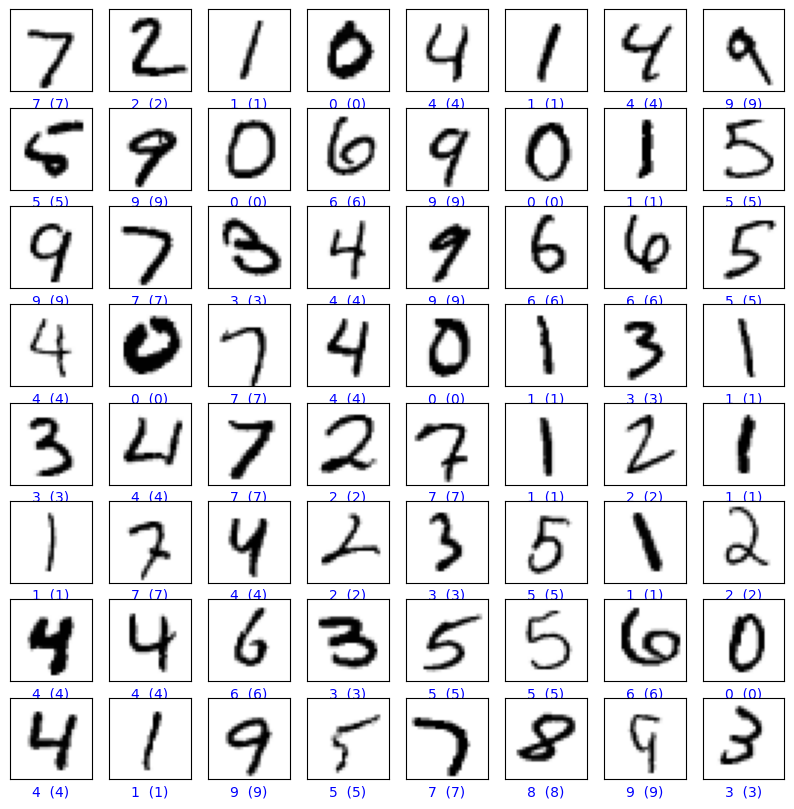

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(x_test[i]), cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = y_test[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color ='red'
  plt.xlabel(f"{predicted_label}  ({true_label})", color=color)

##predicting my own hand written digit

### Loading the image & making suitable for input

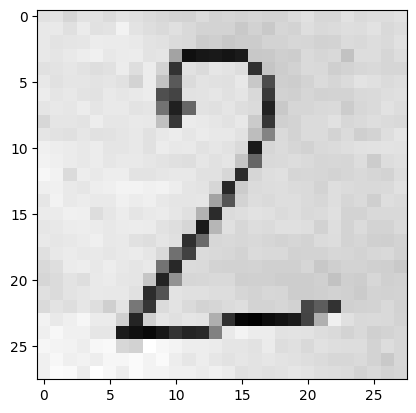

In [51]:
img = cv2.imread('2_digit.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (28, 28))

img = (np.expand_dims(img, axis=-1)/255.).astype(np.float32)

img = img.reshape(1, 28, 28, 1)

plt.grid(False)
plt.imshow(np.squeeze(img), cmap='gray')
# plt.show()

###Predicting using CNN

In [52]:
predict = cnn_model.predict(img)

pred_digit = np.argmax(predict)

print(f"The predicted digit is {pred_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The predicted digit is 2
